<a href="https://colab.research.google.com/github/syx1990/deep-learning/blob/main/mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

流式输出内容被截断，只能显示最后 5000 行内容。
        -5.75552881e-01,  1.71769544e-01,  1.49055282e-02,
        -4.40872721e-02,  2.25651693e-02, -7.98802450e-02,
        -9.76333842e-02, -3.28764170e-02, -6.86610565e-02,
        -9.65651274e-02, -5.70854433e-02, -1.50213838e-01,
        -6.25422746e-02, -7.67019689e-02, -6.93406910e-02,
         2.48346347e-02, -4.14851829e-02, -2.32923403e-01,
        -2.25949407e-01,  7.59525001e-02,  3.80707718e-02,
         1.01153694e-01,  2.52143830e-01, -1.58187971e-02,
        -8.87155086e-02,  1.24156855e-01, -3.61839682e-01,
        -1.73158318e-01, -8.62897485e-02,  1.68164179e-01,
         3.61783765e-02, -5.55487312e-02, -3.42403889e-01,
        -3.86404172e-02, -4.84296381e-02,  9.30436626e-02,
        -2.20039651e-01,  2.01589689e-02,  6.30464926e-02,
         6.88496232e-02,  8.33568648e-02, -5.62156253e-02,
         8.53153914e-02,  2.14884326e-01,  7.56807104e-02,
        -4.80812676e-02,  2.17877284e-01,  1.35085076e-01,
         5.74112544e-03, -1.8

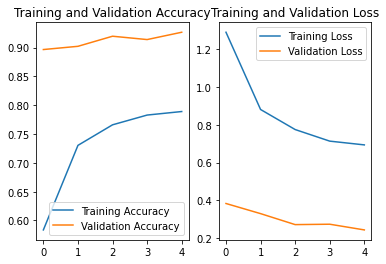

In [1]:
# -*- coding: utf-8 -*-
# !/usr/bin/python3
# author by : yuxiangShi
# email  by: 18538187569@163.com
# desc by: FASHION服饰通过建立模型的方式进行分类,模型保存

# 1.导入包
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from matplotlib import pyplot as plt

# 2.获取数据集
np.set_printoptions(threshold=np.inf)
fashion = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = fashion.load_data()

# 3.将图片像素改为255
x_train,x_test = x_train / 255.0,x_test / 255.0

x_train = x_train.reshape(x_train.shape[0],28, 28, 1) # 给数据增加一个维度,从(60000, 28, 28)reshape为(60000, 28, 28, 1)

# 4.数据增强
image_gen_train = ImageDataGenerator(
     rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)

# 5.创建模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')                                                                      
])

# 6.解析模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 保存模型
checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
  print('-------------load the model-----------------')
  model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_base_only=True)

# 7.训练模型
history = model.fit(image_gen_train.flow(x_train, y_train, batch_size=12),epochs=5,validation_data=(x_test,y_test),
          validation_freq=1,callbacks=[cp_callback])

# 8.分析统计结果
model.summary()
print(model.trainable_variables)
file = open('./weights.txt','w')
for v in model.trainable_variables:
  file.write(str(v.name) + '\n')
  file.write(str(v.shape) + '\n')
  file.write(str(v.numpy()) + '\n')

file.close()

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

